In [247]:
import pandas as pd
import numpy as np

Generating the dataset
To construct a simulated dataset for this scenario, the sklearn.dataset.make_regression↗ function available in the scikit-learn library can be used. The function generates the samples for a random regression problem.

The make_regression↗ function generates samples for inputs (features) and output (target) by applying random linear regression model. The values for generated samples have to be scaled to appropriate range for the given problem.

In [248]:
from sklearn import datasets
import matplotlib.pyplot as plt #for plotting

x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=20,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

Text(0.5, 1.0, 'Experience Vs. Salary')

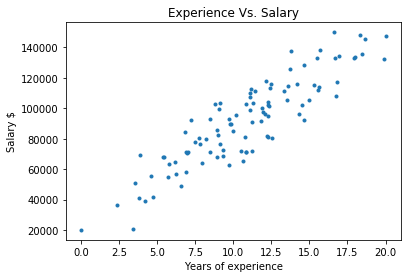

In [249]:
# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')
plt.xlabel('Years of experience'); plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')

In [250]:
# Import Segregating data from scikit learn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [251]:
Results = pd.DataFrame({'Data Type': [],'MAE': [], 'R^2': [], "MSE":[], "RMSE":[]})

In [252]:
# Importing Linear Regression model from scikit learn

from sklearn.linear_model import LinearRegression
# # Create linear regression object
regressor= LinearRegression ()
# Train the model using the training data
regressor.fit(X_train,y_train)

# Predicting the Salary based on the Training Data
y_pred_train= regressor.predict(X_train)

# Predicting the Salary for the Testing Data
y_pred=regressor.predict(X_test)


In [253]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: 24334.075937484624
Coefficient of the line: [6164.36101388]


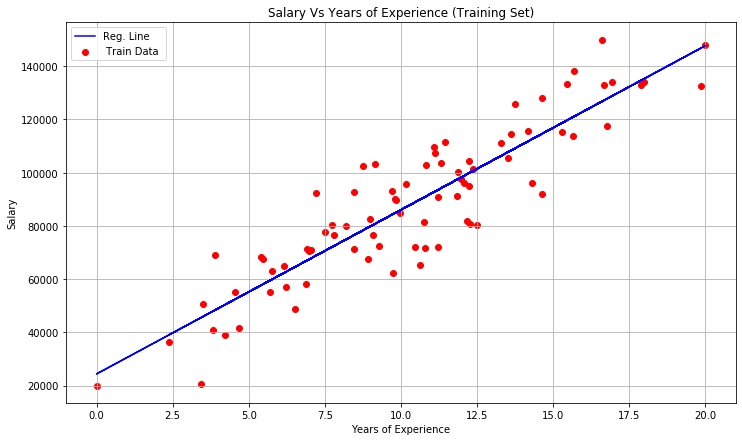

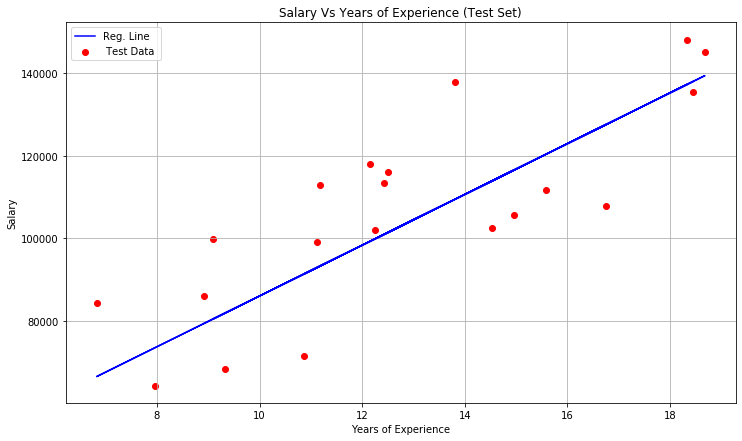

In [254]:
# Data visualization 

plt.figure(figsize=(12,7))
plt.scatter(X_train, y_train, color='red', label=" Train Data ")                      # Training data point
plt.plot(X_train, regressor.predict(X_train), color="blue", label="Reg. Line")         # regression line
plt.title("Salary Vs Years of Experience (Training Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()

plt.figure(figsize=(12,7))
plt.scatter(X_test, y_test, color='red', label=" Test Data ")                      # Testing data point
plt.plot(X_test,regressor.predict(X_test), color="blue", label="Reg. Line")       # regression line
plt.title("Salary Vs Years of Experience (Test Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()

In [255]:
# Regression Model Accurancy Metrics
# The Mean Absolute error(MAE), Mean squared error (MSE), Root mean squared error (RMSE), and R-Squared-
# are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.

# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
# Mean Squared Error (MSE) is the mean of the squared errors 
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt 

# # Training Data Error Matrix

print('Mean absolute error (MAE):->', mean_absolute_error(y_train, y_pred_train))
print('Mean Square error (MSE):->', mean_squared_error(y_train, y_pred_train))
print('Root mean Square Error (RMSE):->', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('r2 score :->', r2_score(y_train, y_pred_train))

res = pd.DataFrame({'Data Type': ['Training Data'],'MAE': [mean_absolute_error(y_train, y_pred_train)],"R^2": [r2_score(y_train, y_pred_train)], "MSE":[mean_squared_error(y_train, y_pred_train)], "RMSE":[sqrt(mean_squared_error(y_train, y_pred_train))]})
Results = Results.append(res)

Mean absolute error (MAE):-> 9858.530737398547
Mean Square error (MSE):-> 148928508.6620625
Root mean Square Error (RMSE):-> 12203.62686507837
r2 score :-> 0.8183600159159332


In [256]:
# Testing Data Error Matrix 

print('Mean absolute error (MAE):->', mean_absolute_error(y_test, y_pred))
print('Mean Square error (MSE):->', mean_squared_error(y_test, y_pred))
print('Root mean Square Error (RMSE):->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score :->', r2_score(y_test,y_pred))

res = pd.DataFrame({'Data Type': ['Testing Data '],'MAE': [mean_absolute_error(y_test, y_pred)],"R^2": [r2_score(y_test, y_pred)], "MSE":[mean_squared_error(y_test, y_pred)], "RMSE":[sqrt(mean_squared_error(y_test, y_pred))]})
Results = Results.append(res)

Mean absolute error (MAE):-> 12950.665031601393
Mean Square error (MSE):-> 212394475.07336795
Root mean Square Error (RMSE):-> 14573.759812531835
r2 score :-> 0.6121519740499255


In [257]:
Results

,Data Type,MAE,R^2,MSE,RMSE
0,Training Data,9858.530737,0.818360,1.489285e+08,12203.626865
0,Testing Data,12950.665032,0.612152,2.123945e+08,14573.759813
